In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import cv2
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train', 'test1', 'sampleSubmission.csv']


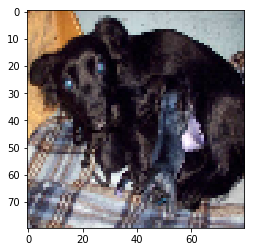

In [29]:
main_dir = "../input/"
train_dir = "train/train"
path = os.path.join(main_dir,train_dir)

for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_COLOR)
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    plt.imshow(new_img_array,cmap="gray")
    break

In [36]:
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)

In [37]:
create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
(X_train.shape,y_train.shape)

((20000, 80, 80, 1), (20000,))

In [40]:
(X_test.shape,y_test.shape)

((5000, 80, 80, 1), (5000,))

In [42]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(80, 80, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [47]:
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_datagen.fit(X_train)

In [48]:
val_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
val_datagen.fit(X_test)


In [55]:
history = model.fit_generator(train_datagen.flow(X_train,y_train,batch_size=100),
                              epochs=15,
                              verbose=1,
                              validation_data=val_datagen.flow(X_test,y_test,batch_size=100))

Epoch 1/15
200/200 [==============================] - 16s 81ms/step - loss: 0.4240 - acc: 0.8030 - val_loss: 0.4560 - val_acc: 0.7786
Epoch 2/15
200/200 [==============================] - 15s 76ms/step - loss: 0.4187 - acc: 0.8092 - val_loss: 0.4322 - val_acc: 0.7924
Epoch 3/15
200/200 [==============================] - 15s 76ms/step - loss: 0.4157 - acc: 0.8086 - val_loss: 0.4158 - val_acc: 0.8044
Epoch 4/15
200/200 [==============================] - 15s 76ms/step - loss: 0.4165 - acc: 0.8117 - val_loss: 0.4193 - val_acc: 0.8104
Epoch 5/15
200/200 [==============================] - 15s 77ms/step - loss: 0.4112 - acc: 0.8128 - val_loss: 0.4818 - val_acc: 0.7898
Epoch 6/15
200/200 [==============================] - 16s 79ms/step - loss: 0.4106 - acc: 0.8112 - val_loss: 0.4038 - val_acc: 0.8172
Epoch 7/15
200/200 [==============================] - 15s 75ms/step - loss: 0.4040 - acc: 0.8153 - val_loss: 0.4093 - val_acc: 0.8180
Epoch 8/15
200/200 [==============================] - 15s 74ms

<Figure size 432x288 with 0 Axes>

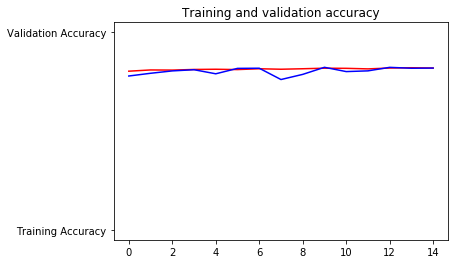

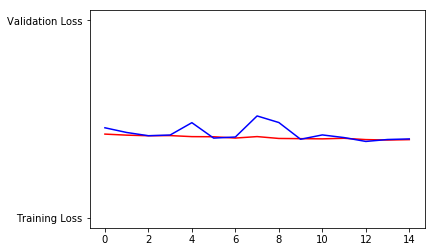

<Figure size 432x288 with 0 Axes>

In [56]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


In [57]:
train_dir = "test1/test1"
path = os.path.join(main_dir,train_dir)
#os.listdir(path)

X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test/255

In [58]:
predictions = model.predict(X_test)

In [59]:
predicted_val = [int(round(p[0])) for p in predictions]

In [60]:
submission_df = pd.DataFrame({'id':id_line, 'label':predicted_val})

In [61]:
submission_df.to_csv("submission.csv", index=False)